In [1]:
import yfinance as yf
df = yf.download("SBIN.NS", start="2015-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [2]:
import pandas as pd

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,300.547516,6138488
2015-01-02,314.350006,318.299988,314.350006,315.250000,301.743958,9935094
2015-01-05,316.250000,316.799988,312.100006,312.750000,299.351074,9136716
2015-01-06,310.000000,311.100006,298.700012,299.899994,287.051605,15329257
2015-01-07,300.000000,302.549988,295.149994,300.149994,287.290863,15046745


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,256.950012,263.899994,255.600006,263.000000,260.594055,29056404
2020-12-24,265.000000,268.850006,264.649994,266.850006,264.408844,28585509
2020-12-28,268.750000,276.000000,268.000000,275.200012,272.682465,36870242
2020-12-29,276.299988,279.899994,274.700012,277.899994,275.357758,45032526
2020-12-30,278.000000,278.700012,272.500000,276.899994,274.366882,30971894


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       314.000000
1       315.250000
2       312.750000
3       299.899994
4       300.149994
           ...    
1474    263.000000
1475    266.850006
1476    275.200012
1477    277.899994
1478    276.899994
Name: Close, Length: 1479, dtype: float64

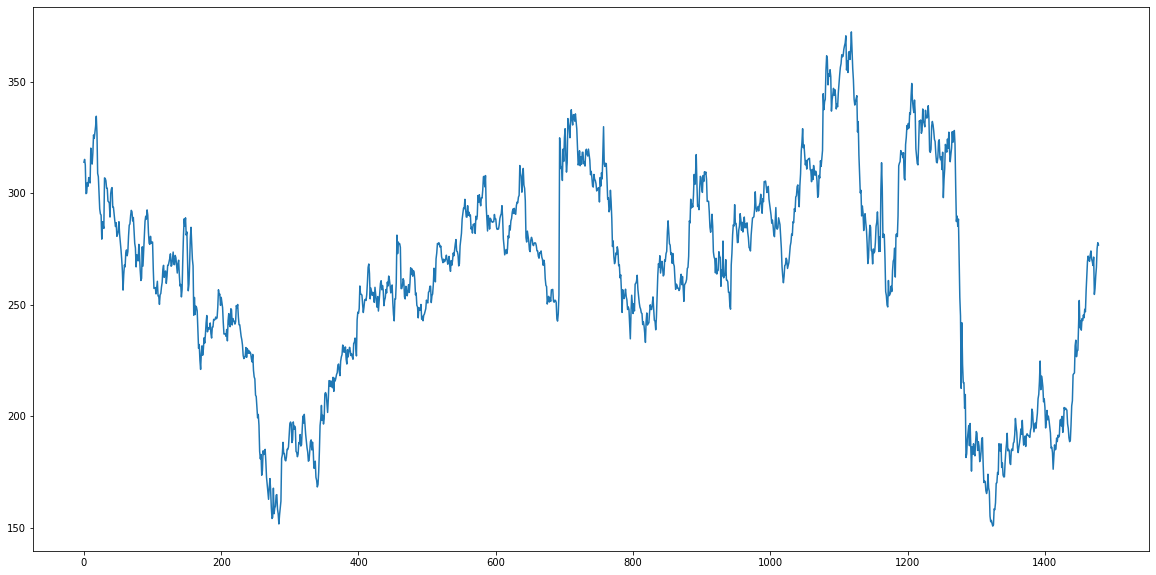

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df1)

#LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [8]:
import numpy as np

In [9]:
df1

0       314.000000
1       315.250000
2       312.750000
3       299.899994
4       300.149994
           ...    
1474    263.000000
1475    266.850006
1476    275.200012
1477    277.899994
1478    276.899994
Name: Close, Length: 1479, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.73640263]
 [0.7420447 ]
 [0.73076056]
 ...
 [0.56127291]
 [0.57345969]
 [0.56894604]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(961, 518)

In [14]:
train_data

array([[0.73640263],
       [0.7420447 ],
       [0.73076056],
       [0.67276008],
       [0.67388849],
       [0.69510272],
       [0.68765522],
       [0.70525845],
       [0.69623114],
       [0.6944257 ],
       [0.7648386 ],
       [0.74294748],
       [0.732566  ],
       [0.75513427],
       [0.79146927],
       [0.78447302],
       [0.79711133],
       [0.80884672],
       [0.82938393],
       [0.79508013],
       [0.71360873],
       [0.70706388],
       [0.67456552],
       [0.64184152],
       [0.6316858 ],
       [0.62942897],
       [0.58068157],
       [0.61588801],
       [0.60979469],
       [0.60234705],
       [0.70458142],
       [0.70345301],
       [0.69893936],
       [0.68381859],
       [0.68359282],
       [0.65763931],
       [0.65628527],
       [0.65312566],
       [0.62536671],
       [0.67276008],
       [0.68223878],
       [0.684947  ],
       [0.64545253],
       [0.64522676],
       [0.63100878],
       [0.61724219],
       [0.60618368],
       [0.613

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 7s 207ms/step - loss: 0.0637 - val_loss: 0.0454
Epoch 2/100
14/14 [==============================] - 2s 135ms/step - loss: 0.0135 - val_loss: 0.0181
Epoch 3/100
14/14 [==============================] - 2s 132ms/step - loss: 0.0073 - val_loss: 0.0154
Epoch 4/100
14/14 [==============================] - 2s 129ms/step - loss: 0.0056 - val_loss: 0.0134
Epoch 5/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0050 - val_loss: 0.0120
Epoch 6/100
14/14 [==============================] - 2s 140ms/step - loss: 0.0047 - val_loss: 0.0109
Epoch 7/100
14/14 [==============================] - 2s 156ms/step - loss: 0.0045 - val_loss: 0.0103
Epoch 8/100
14/14 [==============================] - 2s 167ms/step - loss: 0.0043 - val_loss: 0.0098
Epoch 9/100
14/14 [==============================] - 3s 191ms/step - loss: 0.0041 - val_loss: 0.0093
Epoch 10/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0041 - val_lo

14/14 [==============================] - 2s 172ms/step - loss: 9.0872e-04 - val_loss: 0.0014
Epoch 82/100
14/14 [==============================] - 2s 169ms/step - loss: 9.0098e-04 - val_loss: 0.0015
Epoch 83/100
14/14 [==============================] - 2s 168ms/step - loss: 8.8649e-04 - val_loss: 0.0013
Epoch 84/100
14/14 [==============================] - 2s 169ms/step - loss: 9.0674e-04 - val_loss: 0.0013
Epoch 85/100
14/14 [==============================] - 3s 196ms/step - loss: 8.8564e-04 - val_loss: 0.0013
Epoch 86/100
14/14 [==============================] - 2s 180ms/step - loss: 8.8108e-04 - val_loss: 0.0021
Epoch 87/100
14/14 [==============================] - 2s 177ms/step - loss: 9.7761e-04 - val_loss: 0.0013
Epoch 88/100
14/14 [==============================] - 2s 168ms/step - loss: 8.2492e-04 - val_loss: 0.0013
Epoch 89/100
14/14 [==============================] - 2s 168ms/step - loss: 8.6551e-04 - val_loss: 0.0012
Epoch 90/100
14/14 [==============================] - 2s 17

In [22]:
model.save('kera.h5')

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.7.0'

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

259.33823584253815

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

266.7680784365766

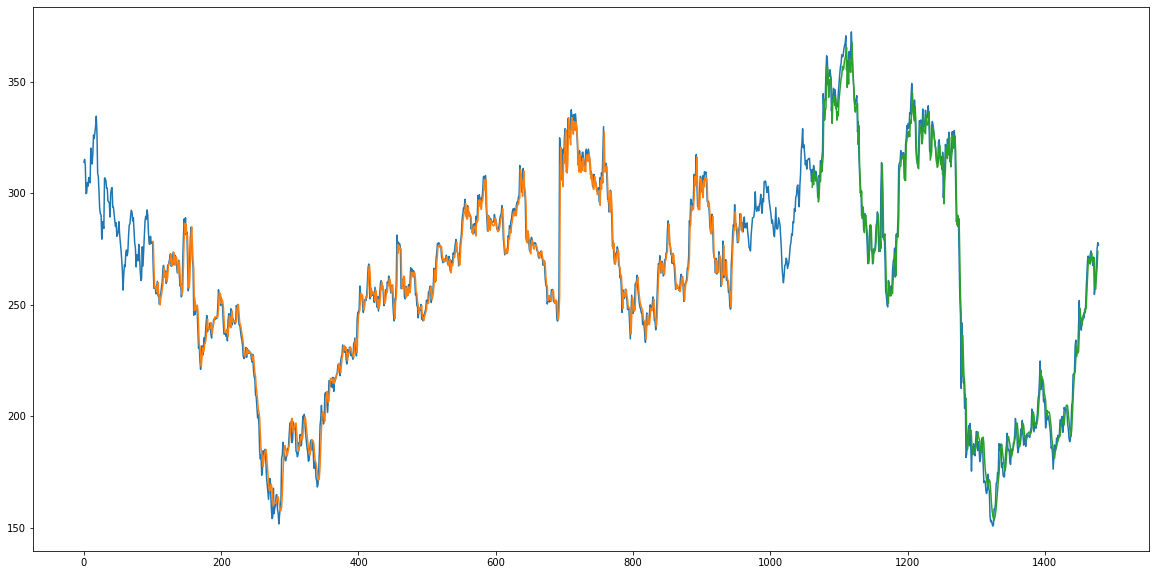

In [29]:
#Plotting 
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

518

In [31]:
x_input=test_data[418:].reshape(1,-1)
x_input.shape


(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.19386142773511494,
 0.19950349529942502,
 0.23674114122387135,
 0.2304219842281071,
 0.20604827989944563,
 0.19070188367368024,
 0.19972919177657644,
 0.2085308034023211,
 0.1981493853094115,
 0.21462419504803887,
 0.2283908536795345,
 0.2577296050139468,
 0.2663055890354352,
 0.2924847274355178,
 0.33401039980715586,
 0.27600991769689043,
 0.30354323495988156,
 0.2951929474155447,
 0.28120059230689765,
 0.25163621336822894,
 0.2575039085367954,
 0.24012638176245749,
 0.19860077826371436,
 0.2134957815351769,
 0.23403292124384456,
 0.21507558800234172,
 0.222523089638073,
 0.21372147801232833,
 0.2013089293708462,
 0.1884450566479563,
 0.15775219532353046,
 0.15955762939495166,
 0.14872488722063437,
 0.11509817831192537,
 0.14150301318915948,
 0.1642969799235512,
 0.15436695478494444,
 0.1559466923792142,
 0.1780636385550467,
 0.17106746100072323,
 0.1839314025965082,
 0.1798690726264679,
 0.18348000964220534,
 0.21417287096663118,
 0.21597830503805238,
 0.20243734288370818,
 0.2220

In [34]:
#demonstrate prediction for next 90 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.56224847]
101
1 day input [0.1995035  0.23674114 0.23042198 0.20604828 0.19070188 0.19972919
 0.2085308  0.19814939 0.2146242  0.22839085 0.25772961 0.26630559
 0.29248473 0.3340104  0.27600992 0.30354323 0.29519295 0.28120059
 0.25163621 0.25750391 0.24012638 0.19860078 0.21349578 0.23403292
 0.21507559 0.22252309 0.21372148 0.20130893 0.18844506 0.1577522
 0.15955763 0.14872489 0.11509818 0.14150301 0.16429698 0.15436695
 0.15594669 0.17806364 0.17106746 0.1839314  0.17986907 0.18348001
 0.21417287 0.21597831 0.20243734 0.22207177 0.18957347 0.20356576
 0.23990069 0.23561273 0.23877227 0.23674114 0.23448431 0.206951
 0.19769799 0.17874066 0.17084176 0.17332429 0.20401715 0.24328593
 0.25344165 0.30602569 0.30850821 0.30986232 0.36492889 0.37621302
 0.34281201 0.35477317 0.35567588 0.40329495 0.45655608 0.40126382
 0.41480478 0.39652447 0.41976983 0.41593319 0.42699163 0.42157526
 0.43872716 0.43376211 0.47596474 0.5084631  0.53599642 0.54637777
 0.53938166 0.53577065 0.54886036 0.

10 day output [[0.5252352]]
11 day input [0.25772961 0.26630559 0.29248473 0.3340104  0.27600992 0.30354323
 0.29519295 0.28120059 0.25163621 0.25750391 0.24012638 0.19860078
 0.21349578 0.23403292 0.21507559 0.22252309 0.21372148 0.20130893
 0.18844506 0.1577522  0.15955763 0.14872489 0.11509818 0.14150301
 0.16429698 0.15436695 0.15594669 0.17806364 0.17106746 0.1839314
 0.17986907 0.18348001 0.21417287 0.21597831 0.20243734 0.22207177
 0.18957347 0.20356576 0.23990069 0.23561273 0.23877227 0.23674114
 0.23448431 0.206951   0.19769799 0.17874066 0.17084176 0.17332429
 0.20401715 0.24328593 0.25344165 0.30602569 0.30850821 0.30986232
 0.36492889 0.37621302 0.34281201 0.35477317 0.35567588 0.40329495
 0.45655608 0.40126382 0.41480478 0.39652447 0.41976983 0.41593319
 0.42699163 0.42157526 0.43872716 0.43376211 0.47596474 0.5084631
 0.53599642 0.54637777 0.53938166 0.53577065 0.54886036 0.55675925
 0.5407357  0.53509363 0.5274205  0.54434671 0.46874293 0.48115555
 0.50620627 0.52358387 

20 day output [[0.5038943]]
21 day input [0.24012638 0.19860078 0.21349578 0.23403292 0.21507559 0.22252309
 0.21372148 0.20130893 0.18844506 0.1577522  0.15955763 0.14872489
 0.11509818 0.14150301 0.16429698 0.15436695 0.15594669 0.17806364
 0.17106746 0.1839314  0.17986907 0.18348001 0.21417287 0.21597831
 0.20243734 0.22207177 0.18957347 0.20356576 0.23990069 0.23561273
 0.23877227 0.23674114 0.23448431 0.206951   0.19769799 0.17874066
 0.17084176 0.17332429 0.20401715 0.24328593 0.25344165 0.30602569
 0.30850821 0.30986232 0.36492889 0.37621302 0.34281201 0.35477317
 0.35567588 0.40329495 0.45655608 0.40126382 0.41480478 0.39652447
 0.41976983 0.41593319 0.42699163 0.42157526 0.43872716 0.43376211
 0.47596474 0.5084631  0.53599642 0.54637777 0.53938166 0.53577065
 0.54886036 0.55675925 0.5407357  0.53509363 0.5274205  0.54434671
 0.46874293 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969
 0.56894604 0.56224847 0.55372661 0.54580384 0.53943866 0.53488493
 0.53193003 0.5301167

30 day input [0.1577522  0.15955763 0.14872489 0.11509818 0.14150301 0.16429698
 0.15436695 0.15594669 0.17806364 0.17106746 0.1839314  0.17986907
 0.18348001 0.21417287 0.21597831 0.20243734 0.22207177 0.18957347
 0.20356576 0.23990069 0.23561273 0.23877227 0.23674114 0.23448431
 0.206951   0.19769799 0.17874066 0.17084176 0.17332429 0.20401715
 0.24328593 0.25344165 0.30602569 0.30850821 0.30986232 0.36492889
 0.37621302 0.34281201 0.35477317 0.35567588 0.40329495 0.45655608
 0.40126382 0.41480478 0.39652447 0.41976983 0.41593319 0.42699163
 0.42157526 0.43872716 0.43376211 0.47596474 0.5084631  0.53599642
 0.54637777 0.53938166 0.53577065 0.54886036 0.55675925 0.5407357
 0.53509363 0.5274205  0.54434671 0.46874293 0.48115555 0.50620627
 0.52358387 0.56127291 0.57345969 0.56894604 0.56224847 0.55372661
 0.54580384 0.53943866 0.53488493 0.53193003 0.53011674 0.52892643
 0.52790552 0.52673233 0.52523518 0.52337372 0.52120245 0.51882666
 0.5163663  0.51392895 0.51159465 0.50941265 0.507

38 day output [[0.4894221]]
39 day input [0.17106746 0.1839314  0.17986907 0.18348001 0.21417287 0.21597831
 0.20243734 0.22207177 0.18957347 0.20356576 0.23990069 0.23561273
 0.23877227 0.23674114 0.23448431 0.206951   0.19769799 0.17874066
 0.17084176 0.17332429 0.20401715 0.24328593 0.25344165 0.30602569
 0.30850821 0.30986232 0.36492889 0.37621302 0.34281201 0.35477317
 0.35567588 0.40329495 0.45655608 0.40126382 0.41480478 0.39652447
 0.41976983 0.41593319 0.42699163 0.42157526 0.43872716 0.43376211
 0.47596474 0.5084631  0.53599642 0.54637777 0.53938166 0.53577065
 0.54886036 0.55675925 0.5407357  0.53509363 0.5274205  0.54434671
 0.46874293 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969
 0.56894604 0.56224847 0.55372661 0.54580384 0.53943866 0.53488493
 0.53193003 0.53011674 0.52892643 0.52790552 0.52673233 0.52523518
 0.52337372 0.52120245 0.51882666 0.5163663  0.51392895 0.51159465
 0.50941265 0.50740409 0.50556898 0.50389433 0.50236201 0.50095367
 0.49965382 0.4984510

48 day output [[0.4869045]]
49 day input [0.23990069 0.23561273 0.23877227 0.23674114 0.23448431 0.206951
 0.19769799 0.17874066 0.17084176 0.17332429 0.20401715 0.24328593
 0.25344165 0.30602569 0.30850821 0.30986232 0.36492889 0.37621302
 0.34281201 0.35477317 0.35567588 0.40329495 0.45655608 0.40126382
 0.41480478 0.39652447 0.41976983 0.41593319 0.42699163 0.42157526
 0.43872716 0.43376211 0.47596474 0.5084631  0.53599642 0.54637777
 0.53938166 0.53577065 0.54886036 0.55675925 0.5407357  0.53509363
 0.5274205  0.54434671 0.46874293 0.48115555 0.50620627 0.52358387
 0.56127291 0.57345969 0.56894604 0.56224847 0.55372661 0.54580384
 0.53943866 0.53488493 0.53193003 0.53011674 0.52892643 0.52790552
 0.52673233 0.52523518 0.52337372 0.52120245 0.51882666 0.5163663
 0.51392895 0.51159465 0.50941265 0.50740409 0.50556898 0.50389433
 0.50236201 0.50095367 0.49965382 0.49845102 0.49733877 0.49631265
 0.49537039 0.49450988 0.49372879 0.49302384 0.49239004 0.49182189
 0.4913128  0.49085626 0

58 day output [[0.48402894]]
59 day input [0.20401715 0.24328593 0.25344165 0.30602569 0.30850821 0.30986232
 0.36492889 0.37621302 0.34281201 0.35477317 0.35567588 0.40329495
 0.45655608 0.40126382 0.41480478 0.39652447 0.41976983 0.41593319
 0.42699163 0.42157526 0.43872716 0.43376211 0.47596474 0.5084631
 0.53599642 0.54637777 0.53938166 0.53577065 0.54886036 0.55675925
 0.5407357  0.53509363 0.5274205  0.54434671 0.46874293 0.48115555
 0.50620627 0.52358387 0.56127291 0.57345969 0.56894604 0.56224847
 0.55372661 0.54580384 0.53943866 0.53488493 0.53193003 0.53011674
 0.52892643 0.52790552 0.52673233 0.52523518 0.52337372 0.52120245
 0.51882666 0.5163663  0.51392895 0.51159465 0.50941265 0.50740409
 0.50556898 0.50389433 0.50236201 0.50095367 0.49965382 0.49845102
 0.49733877 0.49631265 0.49537039 0.49450988 0.49372879 0.49302384
 0.49239004 0.49182189 0.4913128  0.49085626 0.49044523 0.49007329
 0.4897342  0.48942211 0.48913223 0.48885977 0.48860091 0.48835185
 0.48810923 0.4878702

68 day output [[0.48060635]]
69 day input [0.35567588 0.40329495 0.45655608 0.40126382 0.41480478 0.39652447
 0.41976983 0.41593319 0.42699163 0.42157526 0.43872716 0.43376211
 0.47596474 0.5084631  0.53599642 0.54637777 0.53938166 0.53577065
 0.54886036 0.55675925 0.5407357  0.53509363 0.5274205  0.54434671
 0.46874293 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969
 0.56894604 0.56224847 0.55372661 0.54580384 0.53943866 0.53488493
 0.53193003 0.53011674 0.52892643 0.52790552 0.52673233 0.52523518
 0.52337372 0.52120245 0.51882666 0.5163663  0.51392895 0.51159465
 0.50941265 0.50740409 0.50556898 0.50389433 0.50236201 0.50095367
 0.49965382 0.49845102 0.49733877 0.49631265 0.49537039 0.49450988
 0.49372879 0.49302384 0.49239004 0.49182189 0.4913128  0.49085626
 0.49044523 0.49007329 0.4897342  0.48942211 0.48913223 0.48885977
 0.48860091 0.48835185 0.48810923 0.48787025 0.48763239 0.48739341
 0.48715124 0.4869045  0.48665181 0.48639211 0.48612487 0.48584953
 0.48556599 0.485274

77 day output [[0.47763613]]
78 day input [0.42157526 0.43872716 0.43376211 0.47596474 0.5084631  0.53599642
 0.54637777 0.53938166 0.53577065 0.54886036 0.55675925 0.5407357
 0.53509363 0.5274205  0.54434671 0.46874293 0.48115555 0.50620627
 0.52358387 0.56127291 0.57345969 0.56894604 0.56224847 0.55372661
 0.54580384 0.53943866 0.53488493 0.53193003 0.53011674 0.52892643
 0.52790552 0.52673233 0.52523518 0.52337372 0.52120245 0.51882666
 0.5163663  0.51392895 0.51159465 0.50941265 0.50740409 0.50556898
 0.50389433 0.50236201 0.50095367 0.49965382 0.49845102 0.49733877
 0.49631265 0.49537039 0.49450988 0.49372879 0.49302384 0.49239004
 0.49182189 0.4913128  0.49085626 0.49044523 0.49007329 0.4897342
 0.48942211 0.48913223 0.48885977 0.48860091 0.48835185 0.48810923
 0.48787025 0.48763239 0.48739341 0.48715124 0.4869045  0.48665181
 0.48639211 0.48612487 0.48584953 0.48556599 0.48527408 0.48497394
 0.48466602 0.4843508  0.48402894 0.48370087 0.48336759 0.48302981
 0.48268819 0.48234373

87 day output [[0.4748628]]
88 day input [0.55675925 0.5407357  0.53509363 0.5274205  0.54434671 0.46874293
 0.48115555 0.50620627 0.52358387 0.56127291 0.57345969 0.56894604
 0.56224847 0.55372661 0.54580384 0.53943866 0.53488493 0.53193003
 0.53011674 0.52892643 0.52790552 0.52673233 0.52523518 0.52337372
 0.52120245 0.51882666 0.5163663  0.51392895 0.51159465 0.50941265
 0.50740409 0.50556898 0.50389433 0.50236201 0.50095367 0.49965382
 0.49845102 0.49733877 0.49631265 0.49537039 0.49450988 0.49372879
 0.49302384 0.49239004 0.49182189 0.4913128  0.49085626 0.49044523
 0.49007329 0.4897342  0.48942211 0.48913223 0.48885977 0.48860091
 0.48835185 0.48810923 0.48787025 0.48763239 0.48739341 0.48715124
 0.4869045  0.48665181 0.48639211 0.48612487 0.48584953 0.48556599
 0.48527408 0.48497394 0.48466602 0.4843508  0.48402894 0.48370087
 0.48336759 0.48302981 0.48268819 0.48234373 0.4819971  0.48164922
 0.48130089 0.48095301 0.48060635 0.48026136 0.4799189  0.47957948
 0.47924399 0.4789125

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,191)

In [36]:
import matplotlib.pyplot as plt

In [37]:
len(df1)

1479

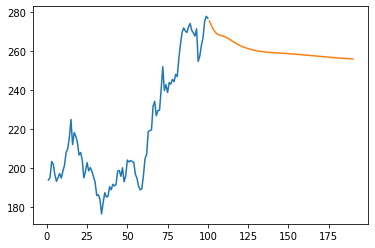

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1379:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

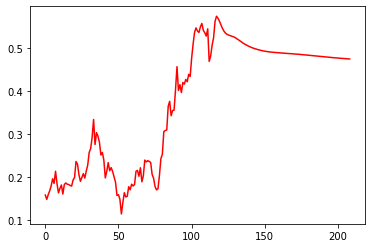

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1360:],color='r')

In [40]:
df3=scaler.inverse_transform(df3).tolist()

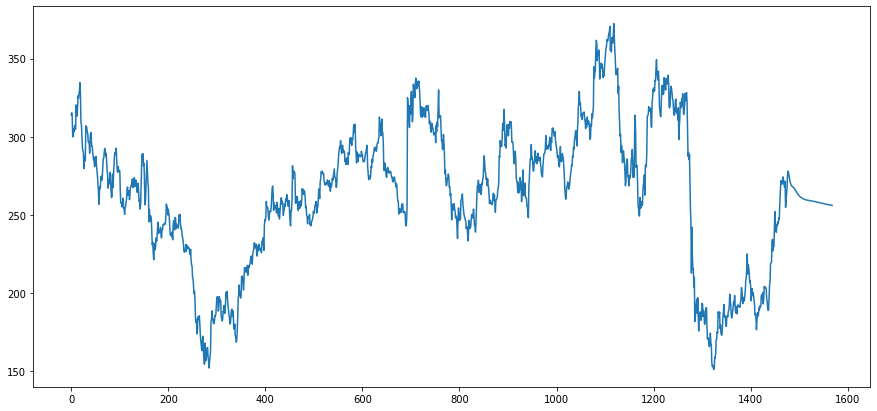

In [41]:

plt.figure(figsize=(15,7))
plt.plot(df3)
